# Student grades prediction

**Project Description**

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


# 1. Importing required libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('grades.csv')

**2. raw data is collected from github link and saved in csv file and imported in Jup notebook for further processing.**

In [92]:
df= pd.DataFrame(data)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# 3. EDA (Exploratory Data Analysis)

In [56]:
df.shape

(571, 43)

Dataset has 571 rows and 43 columns in total.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    object 
 1   HS-101  571 non-null    object 
 2   CY-105  570 non-null    object 
 3   HS-105  570 non-null    object 
 4   MT-111  569 non-null    object 
 5   CS-105  571 non-null    object 
 6   CS-106  569 non-null    object 
 7   EL-102  569 non-null    object 
 8   EE-119  569 non-null    object 
 9   ME-107  569 non-null    object 
 10  CS-107  569 non-null    object 
 11  HS-205  566 non-null    object 
 12  MT-222  566 non-null    object 
 13  EE-222  564 non-null    object 
 14  MT-224  564 non-null    object 
 15  CS-210  564 non-null    object 
 16  CS-211  566 non-null    object 
 17  CS-203  566 non-null    object 
 18  CS-214  565 non-null    object 
 19  EE-217  565 non-null    object 
 20  CS-212  565 non-null    object 
 21  CS-215  565 non-null    object 
 22  MT

In [10]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

From above, we can see t"here are missing values (null) present in the dataset.

First, we will remove incosistent column names by renaming them.

In [93]:
df.rename(columns = {'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'}, inplace = True)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Furthermore, we will drop seatno column as we do not require it for our model.

In [94]:
df.drop(['Seat No.'], axis = 1, inplace = True)

In [60]:
# first 5 rows
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [61]:
# Last 5 rows
df.tail()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,C,D,D,C,C,D+,B,C+,C,D+,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


Now we will treat missing values. We will replace missing values by replacing them with most common class grades. Therefore, in this case we will use mode to replace null values.

In [95]:
dfn = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
dfn

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [96]:
for i in dfn.columns:
    dfn.drop(dfn[(dfn.loc[:,i]=='WU')| (dfn.loc[:,i]=='W')].index,inplace=True)

In [97]:
dfn.reset_index(drop=True,inplace=True)
dfn

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [77]:
dfn.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

So we have successfully replaced null values.

We will have to transform all grades into GPA numerical form.

In [98]:
for column in dfn.columns:
    
    dfn[column] = dfn[column].replace('A+',4.0)
    dfn[column] = dfn[column].replace('A',4.0)
    dfn[column] = dfn[column].replace('A-',3.7)
    dfn[column] = dfn[column].replace('B+',3.4)
    dfn[column] = dfn[column].replace('B',3.0)
    dfn[column] = dfn[column].replace('B-',2.7)
    dfn[column] = dfn[column].replace('C+',2.4)
    dfn[column] = dfn[column].replace('C',2.0)
    dfn[column] = dfn[column].replace('C-',1.7)
    dfn[column] = dfn[column].replace('D+',1.4)
    dfn[column] = dfn[column].replace('D',1.0)
    dfn[column] = dfn[column].replace('F',0.0)

In [99]:
dfn

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7,3.470
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [100]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

In [102]:
dfn.describe()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.067642,2.657952,3.310055,2.916636,3.047166,3.366728,3.000914,3.019927,3.060878,2.750640,...,2.976234,2.744424,3.140402,2.554662,3.373126,3.491042,3.059232,3.010603,3.342779,2.995388
std,0.936537,0.898506,0.873265,0.988782,0.896047,0.765265,0.827071,0.930312,0.797366,0.995601,...,1.012822,0.845166,0.854419,0.865577,0.704635,0.661342,0.720730,0.860316,0.682592,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.700000,2.000000,3.000000,2.000000,2.400000,3.000000,2.700000,2.400000,2.550000,2.000000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.400000,2.700000,2.400000,3.000000,2.587500
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,3.000000,...,3.400000,2.700000,3.400000,2.700000,3.700000,3.700000,3.000000,3.400000,3.700000,3.058000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.474000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


From above, we can get mean, standard deviatio, minimum, maximum, and interquantile range.

In [104]:
dfn.skew()

PH-121   -0.913474
HS-101   -0.260073
CY-105   -1.344620
HS-105   -0.563794
MT-111   -0.779360
CS-105   -1.322190
CS-106   -0.902728
EL-102   -0.768397
EE-119   -0.772804
ME-107   -0.354597
CS-107   -0.645613
HS-205   -1.198672
MT-222   -0.379749
EE-222   -1.069515
MT-224   -0.641933
CS-210   -1.002362
CS-211   -0.261906
CS-203   -0.487893
CS-214   -0.082832
EE-217   -1.017358
CS-212   -0.591061
CS-215   -0.306944
MT-331   -0.935467
EF-303   -0.301034
HS-304   -0.648938
CS-301   -0.673505
CS-302   -0.974971
TC-383   -0.543103
MT-442   -1.286879
EL-332   -0.764509
CS-318   -0.575936
CS-306   -0.765317
CS-312   -0.515075
CS-317   -0.320288
CS-403   -0.753622
CS-421   -0.454525
CS-406   -2.116942
CS-414   -1.971622
CS-419   -0.756138
CS-423   -0.786411
CS-412   -2.069588
CGPA     -0.428093
dtype: float64

In [106]:
dfn.value_counts()

PH-121  HS-101  CY-105  HS-105  MT-111  CS-105  CS-106  EL-102  EE-119  ME-107  CS-107  HS-205  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  CS-214  EE-217  CS-212  CS-215  MT-331  EF-303  HS-304  CS-301  CS-302  TC-383  MT-442  EL-332  CS-318  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  CS-423  CS-412  CGPA 
0.0     0.0     1.0     1.7     3.7     1.4     1.0     3.7     3.7     3.7     4.0     3.7     3.7     4.0     3.7     3.7     3.7     3.7     2.0     3.7     3.7     3.7     4.0     3.0     3.7     3.7     3.7     4.0     3.7     3.7     3.7     3.7     4.0     2.7     4.0     3.0     3.7     4.0     3.7     3.7     3.7     0.800    1
3.7     3.0     3.0     1.7     3.7     4.0     2.7     3.4     2.7     3.0     2.0     3.7     2.0     3.7     3.7     3.7     3.0     4.0     3.7     3.7     3.7     3.4     3.7     1.0     2.0     1.7     3.0     1.4     4.0     3.0     2.4     3.7     2.4     1.4     1.4     1.4     2.7     4.0     2.0     2.4     2.7    

# 4. visualisation

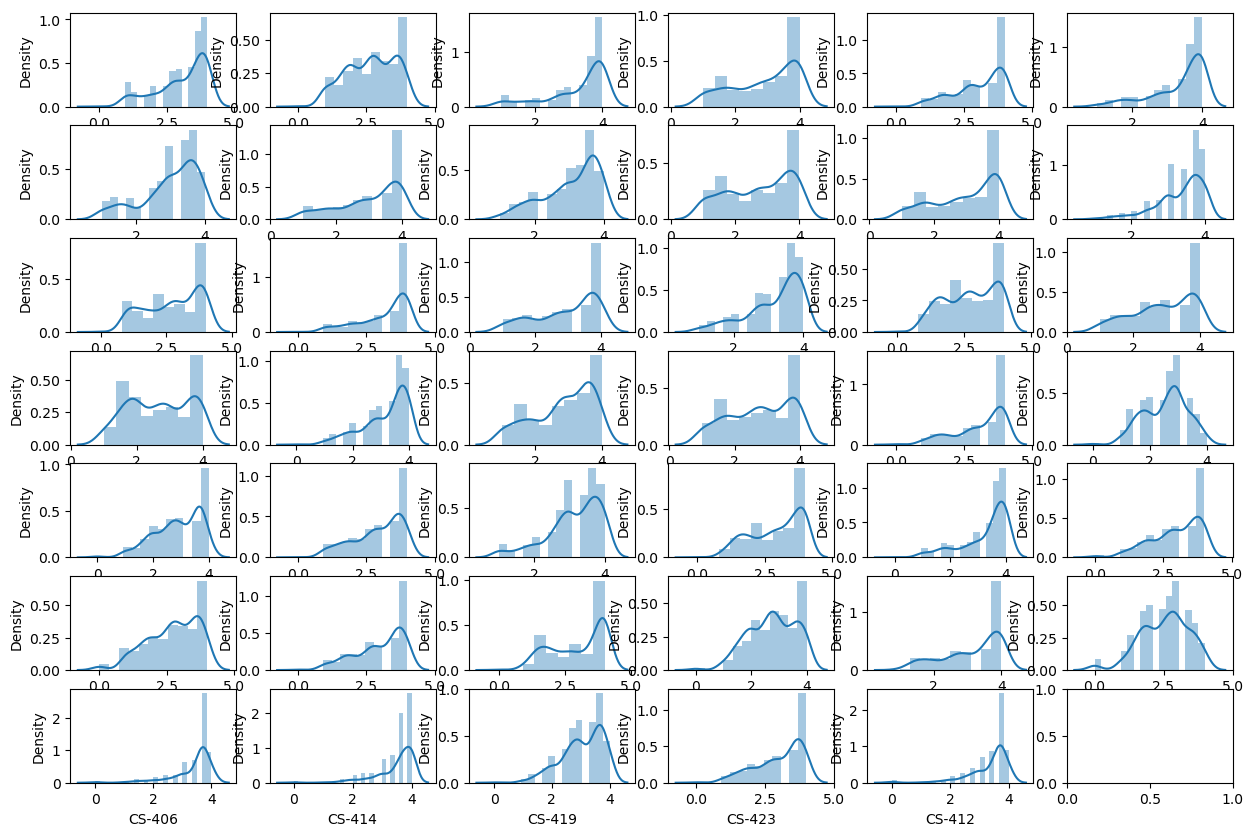

In [109]:
fig, ax = plt.subplots(ncols = 6, nrows = 7, figsize = (15, 10))
index = 0

ax = ax.flatten()
column = dfn.iloc[:,:-1]
for col, value in column.items():
    sns.distplot(value, ax = ax[index])
    index += 1
plt.show()

From above we can see that there are outliers present in the dataset. Some of the colums are normally distributed and other are rightly skewed or left skewed.

PH-121        Axes(0.125,0.77;0.0945122x0.11)
HS-101     Axes(0.238415,0.77;0.0945122x0.11)
CY-105     Axes(0.351829,0.77;0.0945122x0.11)
HS-105     Axes(0.465244,0.77;0.0945122x0.11)
MT-111     Axes(0.578659,0.77;0.0945122x0.11)
CS-105     Axes(0.692073,0.77;0.0945122x0.11)
CS-106     Axes(0.805488,0.77;0.0945122x0.11)
EL-102       Axes(0.125,0.638;0.0945122x0.11)
EE-119    Axes(0.238415,0.638;0.0945122x0.11)
ME-107    Axes(0.351829,0.638;0.0945122x0.11)
CS-107    Axes(0.465244,0.638;0.0945122x0.11)
HS-205    Axes(0.578659,0.638;0.0945122x0.11)
MT-222    Axes(0.692073,0.638;0.0945122x0.11)
EE-222    Axes(0.805488,0.638;0.0945122x0.11)
MT-224       Axes(0.125,0.506;0.0945122x0.11)
CS-210    Axes(0.238415,0.506;0.0945122x0.11)
CS-211    Axes(0.351829,0.506;0.0945122x0.11)
CS-203    Axes(0.465244,0.506;0.0945122x0.11)
CS-214    Axes(0.578659,0.506;0.0945122x0.11)
EE-217    Axes(0.692073,0.506;0.0945122x0.11)
CS-212    Axes(0.805488,0.506;0.0945122x0.11)
CS-215       Axes(0.125,0.374;0.09

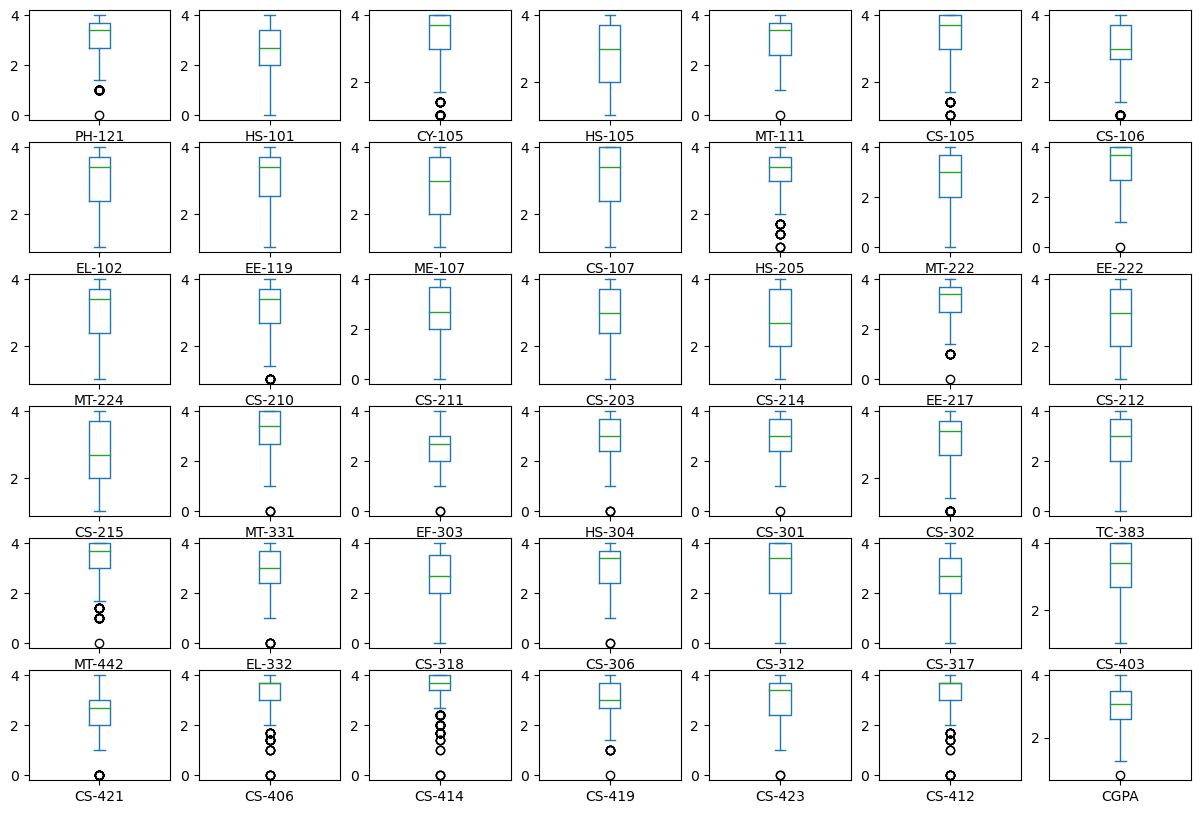

In [111]:
dfn.plot(kind = 'box', subplots = True, layout = (6,7), figsize = (15,10))

<Axes: >

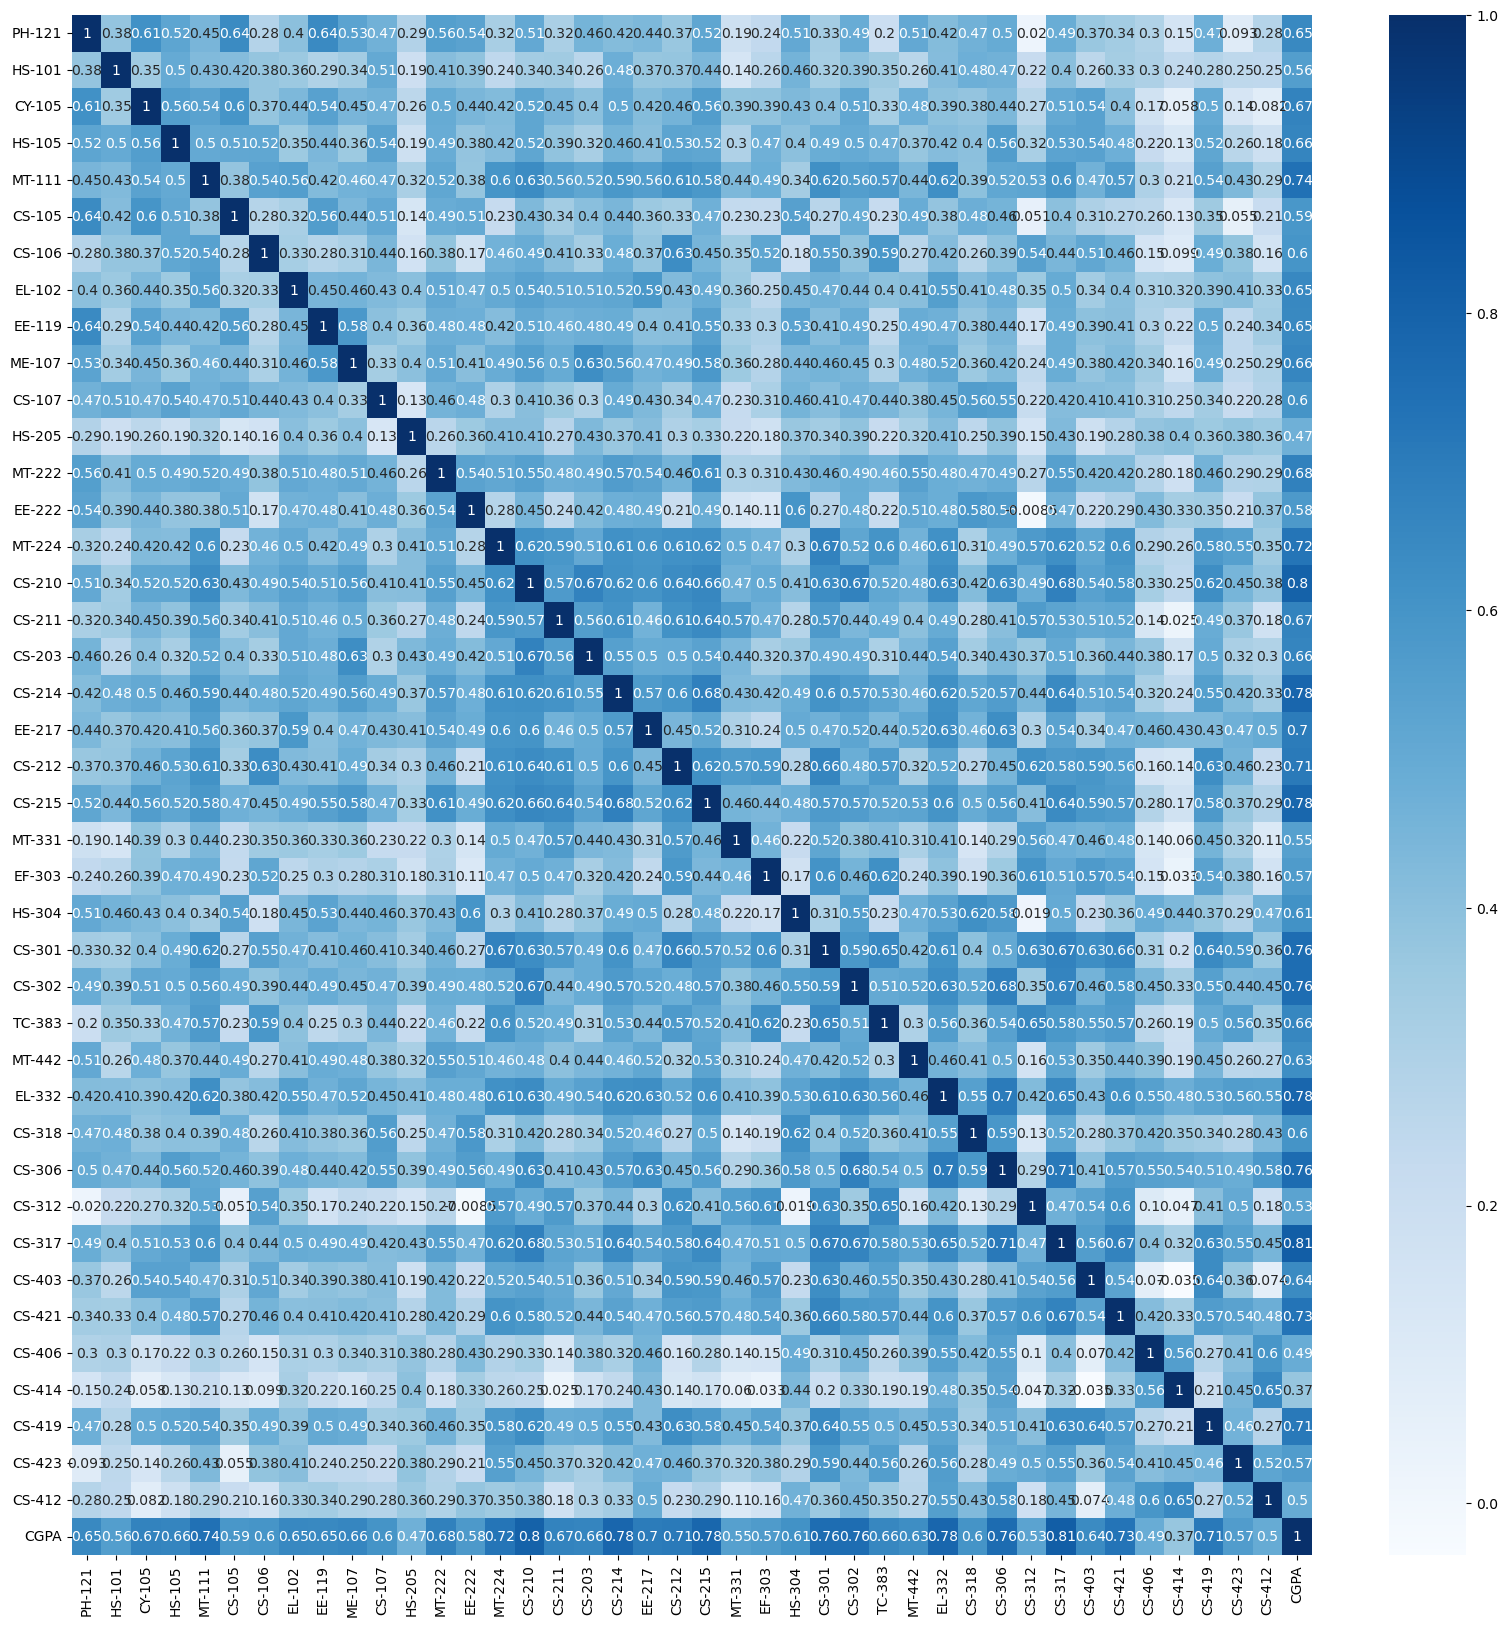

In [128]:
plt.figure(figsize = (20,20))
sns.heatmap(dfn.corr(), cmap = 'Blues', annot =True)

In [129]:
# Removing outliers

In [131]:
z = np.abs(zscore(dfn))
z

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.392914,1.401331,1.845407,0.927884,1.504832,2.572347,2.421491,1.420098,0.453001,1.056248,...,1.261231,1.236894,1.687370,0.988294,0.464315,0.770288,1.887636,0.012336,0.523809,1.346828
1,0.996450,1.846922,2.189260,1.940155,0.387797,1.787588,2.421491,1.054452,2.084861,1.759984,...,1.557704,2.065892,1.335933,1.797744,0.464315,1.197211,1.471010,1.175764,0.502632,1.682518
2,0.996450,0.381033,0.790799,0.219295,0.394128,0.828278,0.364164,0.408917,0.802276,0.954427,...,0.023487,0.302674,1.006982,0.641387,0.890457,0.770288,1.306493,0.802063,0.963713,1.043898
3,2.209774,0.287353,2.189260,1.940155,2.286756,0.435898,1.937414,1.420098,2.586972,0.352511,...,1.557704,0.881609,2.038807,0.988294,0.956157,0.743173,0.915510,0.710393,1.382438,1.856327
4,0.675827,1.160817,0.446946,0.489295,1.064348,0.828278,0.846029,0.408917,1.178859,0.954427,...,0.272987,0.776387,0.304108,0.168063,0.464315,0.770288,0.889867,0.802063,0.963713,0.771256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.072291,1.495011,0.790799,0.792976,1.064348,0.828278,0.846029,0.731685,1.178859,0.652826,...,0.715258,1.131672,1.006982,1.671327,0.890457,0.137788,0.473242,0.012336,0.963713,1.367659
543,0.996450,1.495011,0.790799,1.096658,1.064348,0.828278,1.209086,0.731685,1.178859,1.256029,...,0.418784,0.776387,1.006982,1.671327,0.464315,0.743173,0.889867,1.175764,0.523809,1.323355
544,0.072291,1.495011,0.446946,0.489295,1.064348,0.828278,1.209086,1.054452,1.178859,0.250691,...,0.715258,0.302674,1.006982,0.977513,0.890457,2.256633,0.473242,0.802063,0.523809,0.808744
545,0.996450,0.826624,2.647731,1.096658,2.286756,2.572347,0.364164,1.420098,0.453001,1.056248,...,1.953002,0.302674,0.164475,0.988294,3.370961,2.256633,0.082259,0.361364,1.968976,1.367276


In [132]:
threshold = 3
print(np.where(z>3))

(array([ 56,  83,  84,  84,  84,  84,  84,  84,  88,  98,  98,  98, 135,
       180, 192, 204, 211, 257, 269, 275, 307, 311, 313, 315, 371, 371,
       371, 376, 376, 376, 386, 386, 399, 432, 432, 432, 440, 441, 485,
       488, 491, 491, 494, 494, 494, 494, 494, 494, 499, 499, 499, 499,
       504, 504, 526, 526, 526, 526, 526, 531, 533, 533, 534, 536, 536,
       539, 541, 541, 545, 546, 546, 546], dtype=int64), array([11,  5,  4,  5, 19, 22, 25, 27,  5,  5, 11, 36,  5, 11, 11, 11, 11,
       11, 11, 22, 11,  5, 11,  5, 24, 29, 37, 33, 37, 40, 22, 28, 37, 29,
       36, 40, 40, 36, 11, 36, 36, 40, 29, 31, 33, 36, 39, 40, 24, 33, 36,
       40, 37, 40, 23, 31, 37, 39, 40, 29, 13, 37, 37, 23, 37, 38,  0, 41,
       36, 24, 29, 36], dtype=int64))


In [133]:
df = dfn[(z<3).all(axis=1)]
df

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,3.0,3.0,4.0,2.0,3.0,3.4,3.0,1.7,3.4,3.4,...,3.7,3.0,3.4,3.4,3.4,2.4,3.7,1.4,2.4,2.821
540,3.7,1.0,4.0,2.0,3.4,3.4,2.0,3.7,2.7,1.0,...,3.0,2.4,3.4,1.4,2.0,1.7,3.0,2.0,2.7,2.607
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772


In [134]:
dfn.shape

(547, 42)

In [141]:
df.shape

(508, 42)

In [142]:
x = df.iloc[:,:-1]
x

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,3.0,3.0,4.0,2.0,3.0,3.4,3.0,1.7,3.4,3.4,...,2.7,3.7,3.0,3.4,3.4,3.4,2.4,3.7,1.4,2.4
540,3.7,1.0,4.0,2.0,3.4,3.4,2.0,3.7,2.7,1.0,...,1.7,3.0,2.4,3.4,1.4,2.0,1.7,3.0,2.0,2.7
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7


In [143]:
y = df.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
538    2.821
540    2.607
542    3.798
543    3.772
544    3.470
Name: CGPA, Length: 508, dtype: float64

We have removed outliers from the dataset.

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=42)

# 5. Applying ML model

In [138]:
lm = LinearRegression()
ls = Lasso(alpha = 0.0001)
rd = Ridge(alpha = 0.0001)
en = ElasticNet(alpha = 0.0001)
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
sv= SVR()

In [139]:
model = [lm, ls, rd, en, dtr, knr, sv]

In [148]:
def models():
    for m in model:
        print('Model:', m)
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        
        print('Score:', m.score(x_train,y_train))
        print('Mean-Squared-Error:', mean_squared_error(y_test,pred))
        print('mean_absolute_error:', mean_absolute_error(y_test, pred))
        print('r2_score:', r2_score(y_test,pred))
        print('\n------------------------------------------------------\n')

In [149]:
models()

Model: LinearRegression()
Score: 0.9973123247531441
Mean-Squared-Error: 0.0006945677830298728
mean_absolute_error: 0.019716303428240628
r2_score: 0.9973818304454796

------------------------------------------------------

Model: Lasso(alpha=0.0001)
Score: 0.9973118269910765
Mean-Squared-Error: 0.0007003365432727548
mean_absolute_error: 0.019789596580983036
r2_score: 0.9973600851345046

------------------------------------------------------

Model: Ridge(alpha=0.0001)
Score: 0.9973123247531404
Mean-Squared-Error: 0.0006945677815446561
mean_absolute_error: 0.019716302418736883
r2_score: 0.9973818304510781

------------------------------------------------------

Model: ElasticNet(alpha=0.0001)
Score: 0.9973121920789216
Mean-Squared-Error: 0.000697272697194089
mean_absolute_error: 0.019747413537788264
r2_score: 0.9973716342859609

------------------------------------------------------

Model: DecisionTreeRegressor()
Score: 1.0
Mean-Squared-Error: 0.04726858169934641
mean_absolute_error: 0.

So our best model is Linear Regression model

saving the best model

In [150]:
import joblib

In [152]:
joblib.dump(lm,'lmmodel.obj')
mymodel=joblib.load('lmmodel.obj')

In [153]:
mymodel.predict(x_test)

array([3.7617604 , 2.99691358, 3.50231532, 3.40176853, 3.04724675,
       2.15184859, 2.80877819, 2.67242659, 2.32295227, 2.38596167,
       3.36002887, 3.0728492 , 1.76760841, 2.85305553, 2.29231403,
       2.5878321 , 3.78344266, 3.49456615, 3.2501468 , 3.39377533,
       2.1097863 , 2.87641302, 3.7364157 , 3.56882985, 2.94124767,
       2.78358062, 3.34807509, 3.92567545, 3.30563534, 2.65715404,
       3.88514053, 3.83148426, 2.68687256, 2.79756244, 2.70960062,
       3.25992404, 3.66268942, 3.74969686, 3.61020045, 3.57516987,
       3.34253631, 3.59890365, 3.61971652, 3.22600813, 2.06441356,
       3.34109783, 3.7027904 , 3.17763788, 2.3330363 , 2.92418778,
       3.64330906, 3.04276339, 2.80476134, 2.05501608, 3.1343253 ,
       2.16164837, 2.36420728, 2.99094319, 3.37191896, 2.18327279,
       3.25789023, 3.28846623, 3.27944454, 2.91331217, 2.91129466,
       3.0155011 , 2.82165736, 3.77244617, 2.8262269 , 2.82519054,
       3.90495037, 3.57774808, 3.78399002, 3.6491698 , 2.72850